# Reddit in Nihanje Cene Bitcoinov

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import numpy as np

import glob

import os

import re

In [2]:
# ---------- Nalaganje podatkov (Cena) ----------

def parse_prices_file(file):
    prices = []
    first_line = True
    for line in file:
        if (first_line):
            first_line = False
            continue
        line_split = line.split(";")
        price = float(line_split[2])
        prices.append(price)
    return prices

# bitstamp
bitstamp_prices_file = open("./data/price/bitstamp_bitcoin.txt")
bitstamp_prices = parse_prices_file(bitstamp_prices_file)

## coinmarketcap
coinmarketcap_file = open("./data/price/coinmarketcap_bitcoin.txt")
coinmarketcap_prices = parse_prices_file(coinmarketcap_file)

# ---------- Nalaganje podatkov (Reddit) ----------

def parse_submission_file(file):
    comments = []
    for line_num, line in enumerate(file):
        if line_num == 0:
            file_creationTime = int(line[17:])
            continue
        if line_num == 1:
            subreddit = line[11:]
            continue
        if line_num == 2:
            submission_title = line[18:]
            continue
        if line_num == 3:
            submission_creationTime = int(line[24:])
            continue
        if line_num == 4:
            submission_score = int(line[18:])
            continue
        if line_num == 5:
            continue
        if line_num == 6:
            continue
        comments.append(pase_comment_line(line))
    return (file_creationTime, 
            subreddit, 
            submission_title, 
            submission_creationTime,
            submission_score,
            comments)

def pase_comment_line(line):
    line_split = line.split("\t")
    level = int(line_split[0])
    creationTime = int(line_split[1])
    score = int(line_split[2])
    content = line_split[3]
    
    return (level,
            creationTime,
            score,
            content)

# Naloži vse potrebne podatke

def get_dd_dates(file_names):
    r = []
    for file_name in file_names:
        split = file_name.split("/")
        date = split[-1].replace(".txt", "")
        r.append(date)
    return r

def load_daily_discussion(file_names):
    r = []
    for file_name in file_names:
        file = open(file_name)
        r.append(parse_submission_file(file))
    return r



# naloži DailyDiscussion-Bitcoin
bitcoinDD_filenames = sorted(glob.glob("./data/reddit/daily_discussion_bitcoin/*.txt"))
bitcoinDD_submissions = load_daily_discussion(bitcoinDD_filenames)

# naloži DailyDiscussion-Cryptocurrency
cryptocurrencyDD_filenames = sorted(glob.glob("./data/reddit/daily_discussion_cryptocurrency/*.txt"))
cryptocurrencyDD_submissions = load_daily_discussion(cryptocurrencyDD_filenames)

# prodobi datume za katere obstajajo podatki
dd_dates = get_dd_dates(bitcoinDD_filenames)

In [3]:
# Ugotovi kakšne so bile pravilne napovedi cene

bitstamp_price_correctPredictions = []

for i in range(len(bitstamp_prices) -1):
    price = bitstamp_prices[i]
    nextPrice = bitstamp_prices[i +1]
    if nextPrice > price:
        correct_prediction = 1
    if nextPrice == price:
        correct_prediction = 0
    if nextPrice < price:
        correct_prediction = -1
    bitstamp_price_correctPredictions.append(correct_prediction)
        
print("Correct price predictions (for Bitstamp):")
print(bitstamp_price_correctPredictions)

Correct price predictions (for Bitstamp):
[1, -1, -1, -1, 1, -1, -1, 1, 1]


## Opis podatkov

### Cena Bitcoina

Cena Bitcoinov je pridobljena iz spletnih strani [Bitstamp](https://www.bitstamp.net/) in [CoinMarketCap](https://coinmarketcap.com/).

Cena je v evrih in je pridobljena za vsak dan ob približno isti uri.

### Reddit podatki

Skript za pridobivanje podatkov je shranjen v datoteki "/reddit_data_getter/reddit_data_getter.py". Skript za dostop do Reddita uporablja knjižnico [PRAW](https://github.com/praw-dev/praw). Podatki so shranjeni vsak dan ob približno isti uri.

Reddit podatki so shranjeni v "/data/reddit/", grupirani pa so po Subredditih in dnevih. Za vsak dan za vsak Subreddit je maksimalno 10 datotek. Te predstavljajo "top" submissione (objave) s časovnim filtrom "day".

Za vsako izmed objav je shranjeno:

* iz katerega Subreddita prihaja
* naslov objave
* kdaj je bil submission objavljen
* točke objave

Prav tako je za vsako objavo shranjenih večina komentarjev. Za vsak komentart je shranjeno:

* Level komentarja (komentar objave ima level 0, komentar komentarja ima level 1, ...)
* kdaj je bil komentar ustvarjen
* točke komentarja
* vsebina komentarja

Podatki so pridobljeni iz naslednjih Subredditov:

* /r/Bitcoin
* /r/btc
* /r/BTCNews
* /r/CryptoCurrency
* /r/BitcoinMarkets

Posebej so shranjene objave "Daily Discussion" iz Subredditov /r/Bitcoin in /r/CryptoCurrency. Če je Dnevna Razprava dovolj popularna je shranjena tudi v podatkih o "top" dnevnih objavah.

## Pregled podatkov

### Cena Bitcoina

In [4]:
# Povprečje
bitstamp_mean = np.mean(bitstamp_prices)
coinmarketcap_mean = np.mean(coinmarketcap_prices)

# Mediana
bitstamp_median = np.median(bitstamp_prices)
coinmarketcap_median = np.median(coinmarketcap_prices)

# Max, Min
bitstamp_max = np.max(bitstamp_prices)
bitstamp_min = np.min(bitstamp_prices)
coinmarketcap_max = np.max(coinmarketcap_prices)
coinmarketcap_min = np.min(coinmarketcap_prices)

print("Povprečna cena:")
print("* Bitstamp:", bitstamp_mean)
print("* CoinMarketCap:", coinmarketcap_mean)
print()
print("Mediana cene:")
print("* Bitstamp:", bitstamp_median)
print("* CoinMarketCap: ", coinmarketcap_median)
print()
print("Najvišja/Najnižja cena:")
print("* Bitstamp najvišja:", bitstamp_max)
print("* Bitstamp najnižja:", bitstamp_min)
print("* CoinMarketCap najvišja:", coinmarketcap_max)
print("* CoinMarketCap najnižja:", coinmarketcap_min)

Povprečna cena:
* Bitstamp: 5615.642
* CoinMarketCap: 5636.264

Mediana cene:
* Bitstamp: 5562.845
* CoinMarketCap:  5571.895

Najvišja/Najnižja cena:
* Bitstamp najvišja: 6103.0
* Bitstamp najnižja: 5395.0
* CoinMarketCap najvišja: 6120.96
* CoinMarketCap najnižja: 5411.49


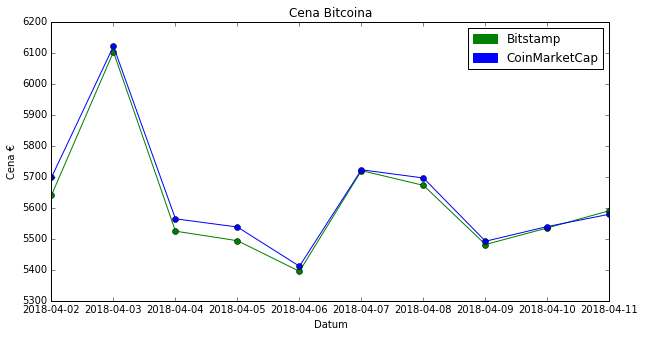

In [5]:
fig, ax = plt.subplots()

x_es = list(range(len(dd_dates)))
x_ticks = dd_dates

fig.set_size_inches(10,5)

# bitstamp
bitstamp_color = "green"
plt.plot(x_es, bitstamp_prices,
         linestyle='-',marker="o",
         color=bitstamp_color)
bitstamp_patch = mpatches.Patch(color=bitstamp_color, label='Bitstamp')

# coinmarketcap
coinmarketcap_color = "blue"
plt.plot(x_es, coinmarketcap_prices,
         linestyle='-',marker="o",
        color=coinmarketcap_color)
coinmarketcap_patch = mpatches.Patch(color=coinmarketcap_color, label='CoinMarketCap')

plt.title("Cena Bitcoina")

plt.legend(handles=[bitstamp_patch, coinmarketcap_patch])

plt.ylabel("Cena €")
plt.xlabel("Datum")

plt.xticks(x_es, x_ticks)

plt.show()
plt.draw()

Opazimo da je cena Bitcoina iz obeh virov zelo podobna in da sledi enakim trendom.
V nadalnje bom zato za vsako primerjavo cene uporabil ceno pridobljeno iz Bitstamp-a.

### Reddit

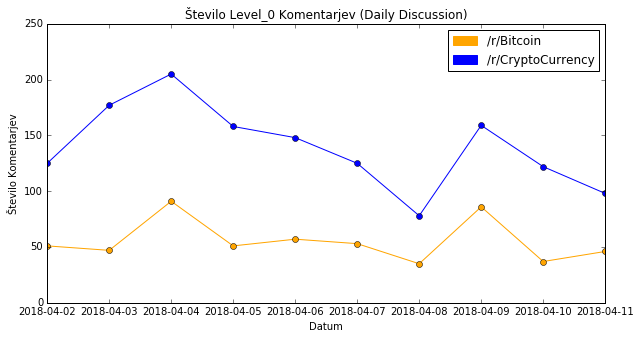

In [6]:
def get_dd_numOfLevel0Comments(submissions):
    r = []
    for submission in submissions:
        numOfLevel0Comments = 0
        comments = submission[5]
        for comment in comments:
            if comment[0] == 0:
                numOfLevel0Comments += 1
        r.append(numOfLevel0Comments)
    return r

bitcoinDD_numOfLevel0Comments = get_dd_numOfLevel0Comments(bitcoinDD_submissions)
cryptocurrencyDD_numOfLevel0Comments = get_dd_numOfLevel0Comments(cryptocurrencyDD_submissions)

fig, ax = plt.subplots()

x_es = list(range(len(dd_dates)))
x_ticks = [date for date in dd_dates]

fig.set_size_inches(10,5)

# bitcoin
plt.plot(x_es, bitcoinDD_numOfLevel0Comments,
         linestyle='-',marker="o",
         color="orange")
bitcoin_patch = mpatches.Patch(color="orange", label='/r/Bitcoin')

# cryptoCurrency
plt.plot(x_es, cryptocurrencyDD_numOfLevel0Comments,
         linestyle='-',marker="o",
        color="blue")
cryptocurrency_patch = mpatches.Patch(color="blue", label='/r/CryptoCurrency')

plt.title("Število Level_0 Komentarjev (Daily Discussion)")

plt.legend(handles=[bitcoin_patch, cryptocurrency_patch])

plt.ylabel("Število Komentarjev")
plt.xlabel("Datum")

plt.xticks(x_es, x_ticks)

plt.show()
plt.draw()

In [7]:
#opravimo nekaj analiz komentarjev

def totalNumOfCommentsForSubmission(submission):
    comments = submission[5]
    return len(comments)

def commentScoreForSubmission(submission):
    comments = submission[5]
    r = 0
    for comment in comments:
        r += comment[2]
    return r

def weightedCommentScoreForSubmission(submission):
    comments = submission[5]
    r = 0
    for comment in comments:
        comment_level = comment[0]
        comment_score = comment[2]
        # (1 - (level * 0.1)) * score
        weighted_score = (1 - (comment_level * 0.1)) * comment_score
        r += weighted_score
    return r

# ----- Bitcoin Daily Discussion

# Število vseh komentarjev
bitcoinDD_totalNumOfComments = []
for submission in bitcoinDD_submissions:
    bitcoinDD_totalNumOfComments.append(totalNumOfCommentsForSubmission(submission))

# Score komentarjev
bitcoinDD_commentScore = []
for submission in bitcoinDD_submissions:
    bitcoinDD_commentScore.append(commentScoreForSubmission(submission))

# Weighted Score Komentarjev
bitcoinDD_weightedCommentScore = []
for submission in bitcoinDD_submissions:
    bitcoinDD_weightedCommentScore.append(weightedCommentScoreForSubmission(submission))
    
# ----- CryptoCurrency

# Število vseh komentarjev
cryptocurrencyDD_totalNumOfComments = []
for submission in cryptocurrencyDD_submissions:
    cryptocurrencyDD_totalNumOfComments.append(totalNumOfCommentsForSubmission(submission))

# Score komentarjev
cryptocurrencyDD_commentScore = []
for submission in cryptocurrencyDD_submissions:
    cryptocurrencyDD_commentScore.append(commentScoreForSubmission(submission))

# Weighted Score Komentarjev
cryptocurrencyDD_weightedCommentScore = []
for submission in cryptocurrencyDD_submissions:
    cryptocurrencyDD_weightedCommentScore.append(weightedCommentScoreForSubmission(submission))

# ----- Skupaj
# Šrevilo vseh komenrarjev
dd_totalNumOfComments = [0 for day in dd_dates]
for i, num in enumerate(bitcoinDD_totalNumOfComments):
    dd_totalNumOfComments[i] += num
for i, num in enumerate(cryptocurrencyDD_totalNumOfComments):
    dd_totalNumOfComments[i] += num

# Score komentarjev
dd_commentScore = [0 for day in dd_dates]
for i, num in enumerate(bitcoinDD_commentScore):
    dd_commentScore[i] += num
for i, num in enumerate(cryptocurrencyDD_commentScore):
    dd_commentScore[i] += num

# Weighted Score Komentarjev
dd_weightedCommentScore = [0 for day in dd_dates]
for i, num in enumerate(bitcoinDD_weightedCommentScore):
    dd_weightedCommentScore[i] += num
for i, num in enumerate(cryptocurrencyDD_weightedCommentScore):
    dd_weightedCommentScore[i] += num

print()
print()
print("Število komentarjev po dnevih:")
print(" -> Bitcoin")
print(bitcoinDD_totalNumOfComments)
print(" -> CryptoCurrency")
print(cryptocurrencyDD_totalNumOfComments)
print()
print("Score vseh komentarjev po dnevih:")
print(" -> Bitcoin")
print(bitcoinDD_commentScore)
print(" -> CryptoCurrency")
print(cryptocurrencyDD_commentScore)
print()
print("Utežen score vseh komentarjev po dnevih:")
print(" -> Bitcoin")
print([round(x) for x in bitcoinDD_weightedCommentScore])
print(" -> CryptoCurrency")
print([round(x) for x in cryptocurrencyDD_weightedCommentScore])



Število komentarjev po dnevih:
 -> Bitcoin
[173, 163, 306, 243, 390, 210, 107, 419, 195, 147]
 -> CryptoCurrency
[467, 498, 493, 479, 499, 456, 302, 475, 474, 464]

Score vseh komentarjev po dnevih:
 -> Bitcoin
[237, 218, 505, 371, 627, 229, 150, 621, 313, 229]
 -> CryptoCurrency
[2654, 2833, 2339, 2448, 2576, 1512, 972, 2369, 2062, 1920]

Utežen score vseh komentarjev po dnevih:
 -> Bitcoin
[204, 189, 440, 314, 490, 190, 134, 516, 259, 206]
 -> CryptoCurrency
[2430, 2632, 2192, 2273, 2374, 1369, 871, 2203, 1899, 1729]


In [8]:
def print_result(correct_predictions, actual_predictions):
    numOfCorrect = 0
    numOfIncorrect = 0
    
    print("Pravilno", "Predvideno", "jeEnako")
    print("---------------------------------------")
    for i in range(len(correct_predictions)):
        correct_prediction = correct_predictions[i]
        actual_prediction = actual_predictions[i]

        isSame = correct_prediction == actual_prediction
        if isSame:
            numOfCorrect += 1
        else:
            numOfIncorrect += 1

        print(str(correct_prediction).rjust(8), str(actual_prediction).rjust(10), str(isSame).rjust(7))

    print()
    print(str(numOfCorrect) + "/" + str(numOfCorrect + numOfIncorrect))

## Predikcija glede na povprečje

Analizirali bomo različne lastnosti komentarjev in si s povprečjem pomagali, da s pomočjo teh lastnosti nato napoveno spremembo cene.

Izpisali bomo kakšna bi bila pravilna napoved ter kako smo gibanje cene predvidili mi.

### Število komentarjev

Predvidevamo da obstaja korelacija med ceno Bitcoina in številom komentarjev: npr.višja cena ustvarja več zanimanja in posledično več komentarjev, in obratno več komentarjev nakazuje večje zanimanje in tako večjo ceno.

In [9]:
# Izračuna povprečno število komentarjev
dd_totalNumOfComments_mean = np.mean(dd_totalNumOfComments)

print("Povprečno število komentarjev:")
print(dd_totalNumOfComments_mean)
print()

# Makes predictions
dd_totalNumOfComments_mean_predictions = []
for numOfComments in dd_totalNumOfComments:
    if numOfComments > dd_totalNumOfComments_mean:
        prediction = 1
    if numOfComments == dd_totalNumOfComments_mean:
        prediction = 0
    if numOfComments < dd_totalNumOfComments_mean:
        prediction = -1
    
    dd_totalNumOfComments_mean_predictions.append(prediction)
    
# removes last prediction becouse there is no correct-prediction data for it
dd_totalNumOfComments_mean_predictions = dd_totalNumOfComments_mean_predictions[:-1]

print_result(bitstamp_price_correctPredictions, dd_totalNumOfComments_mean_predictions)

Povprečno število komentarjev:
696.0

Pravilno Predvideno jeEnako
---------------------------------------
       1         -1   False
      -1         -1    True
      -1          1   False
      -1          1   False
       1          1    True
      -1         -1    True
      -1         -1    True
       1          1    True
       1         -1   False

5/9


### Skupen score

Podobno kot v prejšnji točki predvidevamo da višja cena ustvarja večje zanimanje in obratno, vendar pa se tokrat ne osredotočamo na število komentarjev temveč na skupno oceno (score) komentarjev.

In [10]:
# Izračuna povprečen Score
dd_commentsScore_mean = np.mean(dd_commentScore)

print("Mean comments score:")
print(dd_commentsScore_mean)

# Makes predictions
dd_commentsScore_mean_predictions = []
for commentsScore in dd_commentScore:
    if commentsScore > dd_commentsScore_mean:
        prediction = 1
    if commentsScore == dd_commentsScore_mean:
        prediction = 0
    if commentsScore < dd_commentsScore_mean:
        prediction = -1
    
    dd_commentsScore_mean_predictions.append(prediction)
    
# removes last prediction becouse there is no correct-prediction data for it
dd_commentsScore_mean_predictions = dd_commentsScore_mean_predictions[:-1]

print_result(bitstamp_price_correctPredictions, dd_commentsScore_mean_predictions)

Mean comments score:
2518.5
Pravilno Predvideno jeEnako
---------------------------------------
       1          1    True
      -1          1   False
      -1          1   False
      -1          1   False
       1          1    True
      -1         -1    True
      -1         -1    True
       1          1    True
       1         -1   False

5/9


## Predikcija glede na prejšnji dan

Cena Bitcoina se močno spreminja in zato verjetno ni pametno da se preveč zanašamo na povprečje. Bolje bi bilo da bi se za referenco sklicevali samo na nekaj prejšnjih dni. Ker pa se cena v enem dnevu lahko tako drastično spremeni se bomo za primerjavo raje osredotočili samo na prejšnji dan.

In [11]:
bitstamp_price_yesterdayCorrectPredictions = bitstamp_price_correctPredictions[1:]
print("Correct price predictions (for Bitstamp, when using yesterday predictions):")
print(bitstamp_price_yesterdayCorrectPredictions)

Correct price predictions (for Bitstamp, when using yesterday predictions):
[-1, -1, -1, 1, -1, -1, 1, 1]


### Število komentarjev

In [12]:
# Makes predictions
dd_totalNumOfComments_yesterday_predictions = []
yesterday_numOfComments = None
for numOfComments in dd_totalNumOfComments:
    if yesterday_numOfComments == None:
        yesterday_numOfComments = numOfComments
        continue
    
    if numOfComments > yesterday_numOfComments:
        prediction = 1
    if numOfComments == yesterday_numOfComments:
        prediction = 0
    if numOfComments < yesterday_numOfComments:
        prediction = -1
        
    yesterday_numOfComments = numOfComments
    
    dd_totalNumOfComments_yesterday_predictions.append(prediction)
    
    
# removes last prediction becouse there is no correct-prediction data for it
dd_totalNumOfComments_yesterday_predictions = dd_totalNumOfComments_yesterday_predictions[:-1]

print_result(bitstamp_price_yesterdayCorrectPredictions, dd_totalNumOfComments_yesterday_predictions)

Pravilno Predvideno jeEnako
---------------------------------------
      -1          1   False
      -1          1   False
      -1         -1    True
       1          1    True
      -1         -1    True
      -1         -1    True
       1          1    True
       1         -1   False

5/8


### Skupen score

In [13]:
# Makes predictions
dd_commentsScore_yesterday_predictions = []
yesterday_commentsScore = None
for commentsScore in dd_commentScore:
    if yesterday_commentsScore == None:
        yesterday_commentsScore = commentsScore
        continue
    
    if commentsScore > yesterday_commentsScore:
        prediction = 1
    if commentsScore == yesterday_commentsScore:
        prediction = 0
    if commentsScore < yesterday_commentsScore:
        prediction = -1
        
    yesterday_commentsScore = commentsScore
    
    dd_commentsScore_yesterday_predictions.append(prediction)
    
    
# removes last prediction becouse there is no correct-prediction data for it
dd_commentsScore_yesterday_predictions = dd_commentsScore_yesterday_predictions[:-1]

print_result(bitstamp_price_yesterdayCorrectPredictions, dd_commentsScore_yesterday_predictions)

Pravilno Predvideno jeEnako
---------------------------------------
      -1          1   False
      -1         -1    True
      -1         -1    True
       1          1    True
      -1         -1    True
      -1         -1    True
       1          1    True
       1         -1   False

6/8


### Ugotovitev

Ugotovili smo da večje zanimanje lahko pomeni dvig cene.

Ko ugotavljamo ali se je zanimanje zvečalo pa je bolje da se pri Bitcoinih zaradi drastičnih sprememb ne zanašamo samo na povprečje, temveč damo večjo ceno podatkom, ki so bližje tem ki jih trenutno uporabljamo za napovedovanje.

## Analiza besed

Znani rek pravi da ni vse v številkah. Pri našem problemu se to prevede na to da nam število komentarjev bolj malo pove, če sploh ne vemo kakšni komentarji so.

V komentarjih bom iskal pozitivne in negativne besede. To so tiste besede ki bi nakazovale rast oz. padanje cene (npr. buy/sell). Glede na najdene besede bom nato vsakemu komentarju priredil neko številko ki nakazuje kako močno je komentar pozitiven/negativen.

In [14]:
# Besede
positive_words = [
    "increase",
    "high",
    "top",
    "buy",
    "invest",
    "positive",
    "up",
    "good",
    "happy",
    "\+",
    "gain"
    "win",
    "max",
    "flourish",
    "rise",
]

negative_words = [
    "decrease",
    "low",
    "bottom",
    "sell",
    "take out"
    "negative",
    "down",
    "bad",
    "sad",
    "\-",
    "loss",
    "lose",
    "min",
    "decline",
    "fall",
]

compiled_positive_words = [re.compile((word + ".*")) for word in positive_words]
compiled_negative_words = [re.compile((word + ".*")) for word in negative_words]

# Pomožne funkcije 

def get_num_of_positive_words(text):
    r = 0
    for word in text.split(" "):
        for positive_word in compiled_positive_words:
            isMatch = bool(re.match(positive_word, word))
            if (isMatch):
                r+= 1
    return r

def get_num_of_negative_words(text):
    r = 0
    for word in text.split(" "):
        for negative_word in compiled_negative_words:
            isMatch = bool(re.match(negative_word, word))
            if (isMatch):
                r+= 1
    return r

def predict_from_comment(comment):
    comment_content = comment[3]
    num_of_positive = get_num_of_positive_words(comment_content)
    num_of_negative = get_num_of_negative_words(comment_content)
    return num_of_positive - num_of_negative    

### Pozitivni negativeni komentarji

Dan je ocenjen samo glede na število pozitivnih/negativnih komentarjev.

Pravilno Predvideno jeEnako
---------------------------------------
       1          1    True
      -1          1   False
      -1          1   False
      -1         -1    True
       1          1    True
      -1          1   False
      -1          1   False
       1         -1   False
       1          1    True

4/9


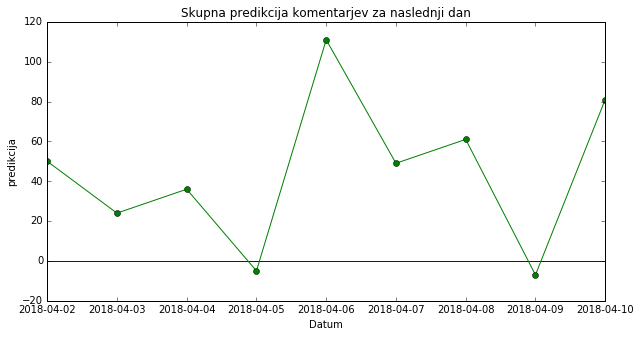

In [15]:
dd_full_predictions = []

# bitcoinDD
for submission in bitcoinDD_submissions:
    submission_prediction = 0
    
    submission_comments = submission[5]
    for comment in submission_comments:
        comment_prediction = predict_from_comment(comment)
        submission_prediction += comment_prediction
        
    dd_full_predictions.append(submission_prediction)
    
# cryptocurrencyDD
for i, submission in enumerate(cryptocurrencyDD_submissions):
    submission_prediction = 0
    
    submission_comments = submission[5]
    for comment in submission_comments:
        comment_prediction = predict_from_comment(comment)
        submission_prediction += comment_prediction
        
    dd_full_predictions[i] += submission_prediction
    
# removes last prediction becouse there is no correct-prediction data for it
dd_full_predictions = dd_full_predictions[:-1]    
    
# Graf
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
x_es = list(range(len(dd_full_predictions)))
plt.plot(x_es, [0 for x in x_es])
plt.plot(x_es, dd_full_predictions, linestyle='-',marker="o")
x_ticks = [dd_dates[i] for i in x_es]
plt.xticks(x_es, x_ticks)
plt.title("Skupna predikcija komentarjev za naslednji dan")
plt.xlabel("Datum")
plt.ylabel("predikcija")

# Predikcije sprevi na 0,1,-1
dd_predictions = []

for full_prediction in dd_full_predictions:
    prediction = 0
    if full_prediction > 0:
        prediction = 1
    if full_prediction < 0:
        prediction = -1
    dd_predictions.append(prediction)
    
print_result(bitstamp_price_correctPredictions, dd_predictions)

### Uteženi komentarji

Da iz komentarjev iztisnemo čim več si pomagamo še z levelom in točkami komentarja.

Tukaj sklepamo da ko nekdo prebere komentar s katerim se strinja, ne bo šel pisati podobnega komentarja ampak bo ta komentar enostavno dobro ocenil. Tudi Level (globina) komentarja je pomembna saj so komentarji z nižjo globino bolj vidni. Kot vsebino komentarja bomo upoštevali samo tri vrednosti (pozitiven, negativen in nevtralen) s tem se bomo izognili napaki ki bi jo pozročali komentarji ki uporabljajo veliko pozitivnih/negativnih besed (npr. "I think Bitcoin price will *increase* up to *+*6000$ sou you should definitively *buy*")

Pravilno Predvideno jeEnako
---------------------------------------
       1          1    True
      -1         -1    True
      -1          1   False
      -1          1   False
       1          1    True
      -1          1   False
      -1          1   False
       1         -1   False
       1          1    True

4/9


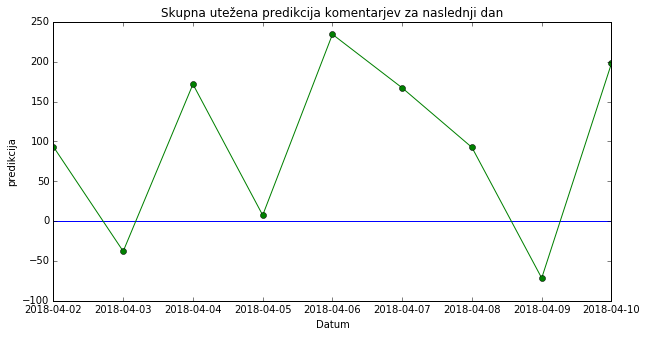

In [16]:
dd_full_weightedPredictions = []

# bitcoinDD
for submission in bitcoinDD_submissions:
    submission_prediction = 0
    
    submission_comments = submission[5]
    for comment in submission_comments:
        comment_level = comment[0]
        comment_score = comment[2]
        comment_prediction = predict_from_comment(comment)
        if (comment_prediction > 0):
            comment_prediction = 1
        if (comment_prediction < 0):
            comment_prediction = -1      
        # ((1 - (level * 0,1)) * score) * (+-1 _odvisno_ali_je_komentar_pozitiven_ali_negativen_)
        prediction = ((1 - (comment_level * 0.1)) * comment_score) * comment_prediction
        submission_prediction += prediction
    
    dd_full_weightedPredictions.append(submission_prediction)
    
# cryptocurrencyDD
for i, submission in enumerate(cryptocurrencyDD_submissions):
    submission_prediction = 0
    
    submission_comments = submission[5]
    for comment in submission_comments:
        comment_level = comment[0]
        comment_score = comment[2]
        comment_prediction = predict_from_comment(comment)
        if (comment_prediction > 0):
            comment_prediction = 1
        if (comment_prediction < 0):
            comment_prediction = -1  
        # ((1 - (level * 0,1)) * score) * (+-1 _odvisno_ali_je_komentar_pozitiven_ali_negativen_)
        prediction = ((1 - (comment_level * 0.1)) * comment_score) * comment_prediction
        submission_prediction += prediction
    
    dd_full_weightedPredictions[i] += submission_prediction
        
# removes last prediction becouse there is no correct-prediction data for it
dd_full_weightedPredictions = dd_full_weightedPredictions[:-1]         
        
# Graf
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
x_es = list(range(len(dd_full_weightedPredictions)))
plt.plot(x_es, [0 for x in x_es])
plt.plot(x_es, dd_full_weightedPredictions, linestyle='-',marker="o")
x_ticks = [dd_dates[i] for i in x_es]
plt.xticks(x_es, x_ticks)
plt.title("Skupna utežena predikcija komentarjev za naslednji dan")
plt.xlabel("Datum")
plt.ylabel("predikcija")

dd_predictions = []
for full_prediction in dd_full_weightedPredictions:
    prediction = 0
    if full_prediction > 0:
        prediction = 1
    if full_prediction < 0:
        prediction = -1
    dd_predictions.append(prediction)
    
print_result(bitstamp_price_correctPredictions, dd_predictions)

### Ugotovitev

Pri napovedovanju s pomočjo analize besed nismo bili preveč uspešni. Verjetno del problema leži v tem da nismo upoštevali da so lahko besede tudi negativne (npr. "will not increase"). 

Še večji problem pa bi znal priti iz osnovne človeške psihologije, če pomislimo nas že kot otroke učijo naj na življenje gledamo s pozitivne strani, res je da hočemo iz problemov kot je pogovor o ceni izpustiti vsa čustve, vendar pa je to zaradi človeške narave skoraj nemogoče. In res kakšen bi bil svet če bi bili sami negativci.